In [7]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self , X , y):
        X_train , X_test , y_train , y_test = train_test_split (X, y, test_size =self.test_size ,random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,y_train,X_test,y_test , self.indices_)
        self.scores_=[score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_ , r=dim -1):
                score = self._calc_score(X_train , y_train , X_test , y_test , p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -=1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self 
    def transform(self , X):
        return X[: , self.indices_]
    def _calc_score(self , X_train , y_train , X_test , y_test , indices):
        self.estimator.fit(X_train[:,indices], y_train )
        y_pred = self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score

In [8]:
import numpy as np 
import pandas as pd
df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=1 , stratify = y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors= 5)
sbs = SBS(knn , k_features=1)
sbs.fit(X_train_std , y_train)

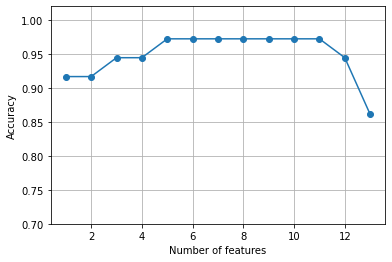

In [14]:
import matplotlib.pyplot as plt
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat , sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features' )
plt.grid()
plt.show()
